# Part 1 – Data Loading and pre-processing


**a) Load the data into a pandas DataFrame**

In [3]:
# Importing pandas

import pandas as pd

In [5]:
# Loading the diamonds dataset

diamonds_dataset = pd.read_csv("../data/diamonds.csv")

**b) Clean the dataset by removing datapoints with missing values and datapoints that are repeated**

In [12]:
# Dropping missing values and duplicates

diamonds_dataset.dropna()
diamonds_dataset.drop_duplicates()

**c) For each feature in the dataset, make a figure containing 2 subplots showing:**
- The histogram of the values of the feature (all classes combined).
- The histogram of the values of the feature separately for each class, when using the
“cut” column as the class identifier. Use a different color for each class.

In [17]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Creating a method to plot histograms

def plot_histograms(column: str):
  fig, axs = plt.subplots(nrows=2, figsize=(10, 8))
  sns.histplot(diamonds_dataset, x=column, stat="density", bins=50, ax=axs[0])
  sns.histplot(diamonds_dataset, x=column, stat="density", bins=50, ax=axs[1], hue="cut")

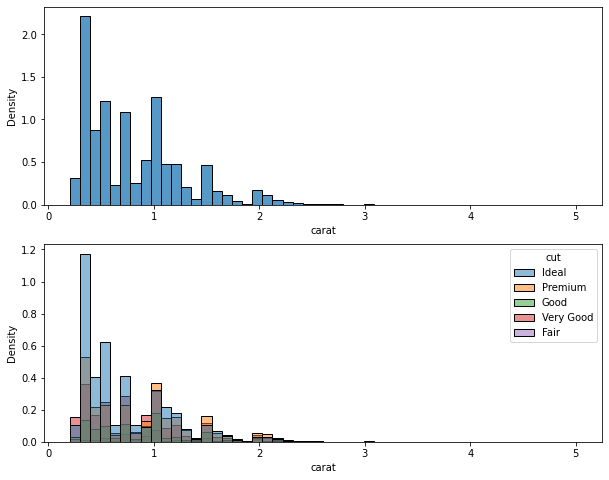

In [30]:
# Plotting the histograms for "carat"

plot_histograms("carat")

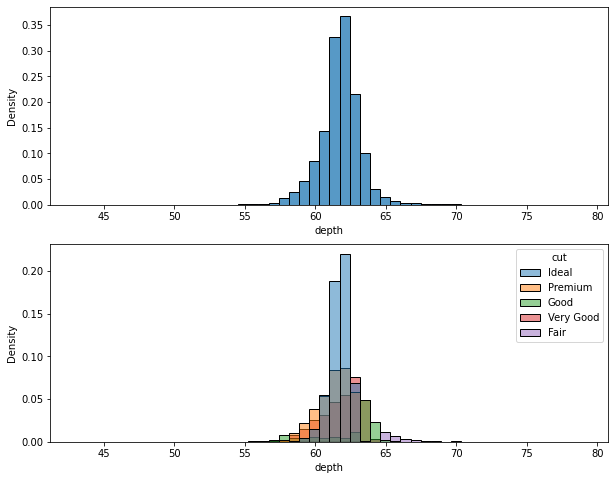

In [32]:
# Plotting the histograms for "depth"

plot_histograms("depth")

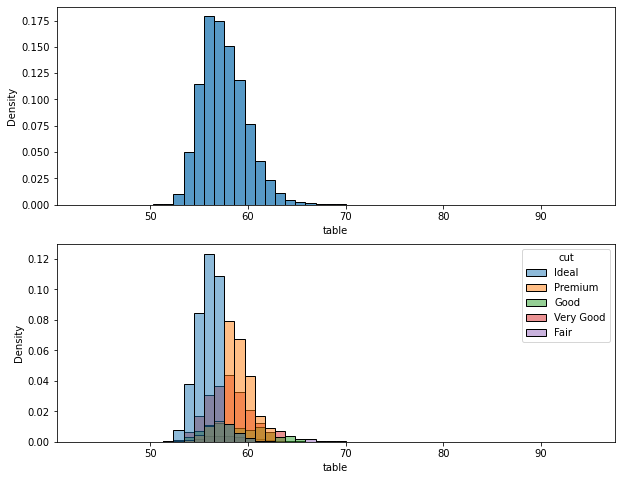

In [33]:
# Plotting the histograms for "table"

plot_histograms("table")

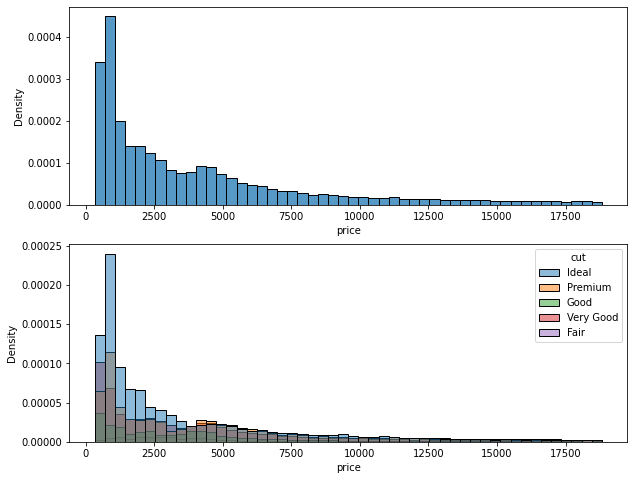

In [34]:
# Plotting the histograms for "price"

plot_histograms("price")

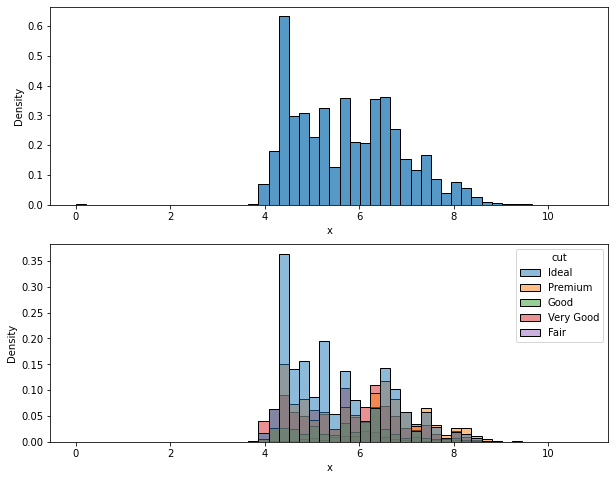

In [35]:
# Plotting the histograms for "x"

plot_histograms("x")

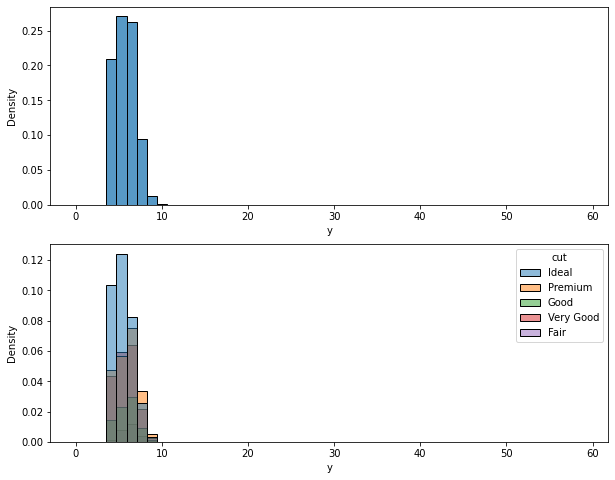

In [36]:
# Plotting the histograms for "y"

plot_histograms("y")

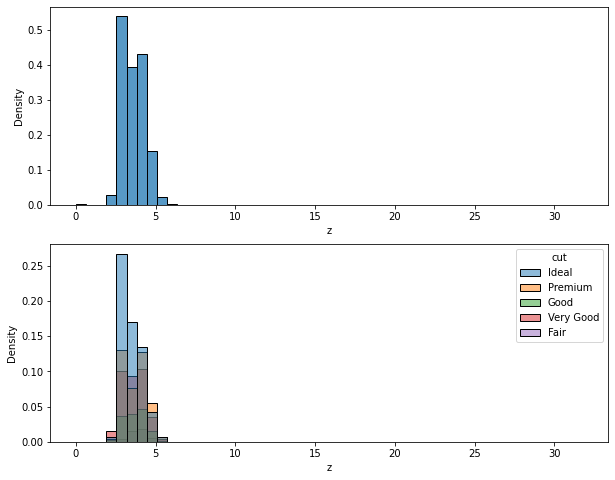

In [37]:
# Plotting the histograms for "z"

plot_histograms("z")